In [85]:
import pylab as plt
import numpy as np
import swot_ssh_utils as swot
import swot_swell_utils as swell
from cartopy import crs as ccrs
from netCDF4 import Dataset
import xarray as xr
from scipy import ndimage

import sys as sys
import pickle
import glob as glob
import datetime


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.pyplot import cm
import cmocean
import cmocean.cm as cmo

#PATH_with_functions = '/home/ardhuin/TOOLS/OPTOOLS/PYTHON/'
#sys.path.append(PATH_with_functions)
from  spectral_analysis_functions import *
plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

We have  0 225  files.
fileSWOT = data["fileSWOT"]
cycle = data["cycle"]
tracks = data["tracks"]
side = data["side"]
boxindices = data["boxindices"]
lonc = data["lonc"]
latc = data["latc"]
timec = data["timec"]
trackangle = data["trackangle"]
kx2 = data["kx2"]
ky2 = data["ky2"]
E_SWOT = data["E_SWOT"]
sig0_spec = data["sig0_spec"]
coh = data["coh"]
ang = data["ang"]
amask = data["amask"]
sig0mean = data["sig0mean"]
sig0std = data["sig0std"]
HH = data["HH"]
HH2 = data["HH2"]
Hs_SWOT_filtered_all = data["Hs_SWOT_filtered_all"]
Hs_SWOT_filtered_mask = data["Hs_SWOT_filtered_mask"]
Hs_SWOT_mask = data["Hs_SWOT_mask"]
Lm_SWOT_filtered_mask = data["Lm_SWOT_filtered_mask"]
dm_SWOT_filtered_mask = data["dm_SWOT_filtered_mask"]
modelfound = data["modelfound"]
timeww3 = data["timeww3"]
lonww3 = data["lonww3"]
latww3 = data["latww3"]
indww3 = data["indww3"]
distww3 = data["distww3"]
E_WW3_obp_H = data["E_WW3_obp_H"]
E_WW3_obp_H2 = data["E_WW3_obp_H2"]
Hs_WW3 = data["Hs_WW3"]
Hs_WW3_all = data["Hs

/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_swell_utils.py:52: RuntimeWarning: invalid value encountered in scalar divide
  Lmp1_SWOT=m0/mp1
/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_swell_utils.py:53: RuntimeWarning: invalid value encountered in scalar divide
  Lmm1_SWOT=mm1/m0
/tmp/ipykernel_17974/2718919434.py:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0].scatter(bigarray[0:-1,12],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT denoised');
/tmp/ipykernel_17974/2718919434.py:96: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color

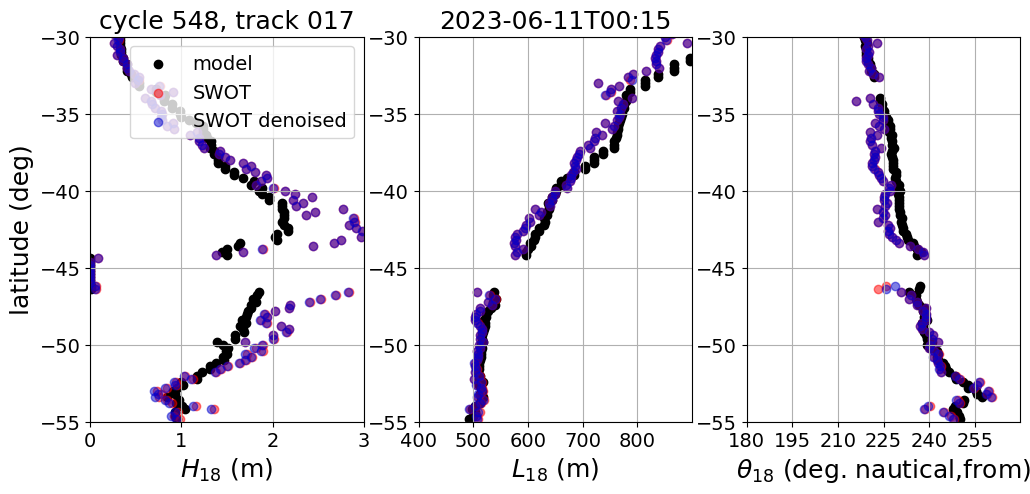

In [89]:
# Note : other tests with different spectral resolution are in directories LOOP, LOOP2, LOOP3
calibration=1.
# First track for Figure 4.
cycle='547';tracks='008';latrange=[-20,-8];Lrange=[500,1100];thrange=[190,240];thstep=10;Hrange=[0,1.5];locleg='upper right';ileg=0;

# track for Figure S7a
cycle='548';tracks='017';latrange=[-55,-30];Lrange=[400,900];thrange=[180,270];thstep=15;Hrange=[0,3];locleg='upper right';ileg=0;calibration=1
# track for Figure S7b
#cycle='550';tracks='017';latrange=[-33,-5];Lrange=[400,900];thrange=[180,240];thstep=15;Hrange=[0,3];locleg='upper right';ileg=0;calibration=0.8

file_list = sorted(glob.glob('ANIMATION/SWOT_swell_spectra_'+cycle+'_'+tracks+'_left_*.npz'));
#file_list = sorted(glob.glob('LOOP3/SWOT_swell*_'+tracks+'left_*.npz'));
nfiles=len(file_list)
file_lisl = sorted(glob.glob('ANIMATION/SWOT_swell_spectra_'+cycle+'_'+tracks+'_right_*.npz'));
nfilel=len(file_lisl)
tracktag='cycle '+cycle+', track '+tracks;
print('We have ',nfiles,nfilel,' files.')
bigarray=np.zeros((nfiles+nfilel,50))
indf=0
obpfilter='H2'
for file_list in [file_list,file_lisl]:
  for file_box in file_list:
    #Eta_WW3_obp_H2=[]
    #print('reading file ',file_box)
    data = np.load(file_box,allow_pickle=True)
    for k in data.keys():
        if (indf==0):
            print(k+' = data["'+k+'"]')
        exec(k+' = data["'+k+'"]')
    bigarray[indf,0]=timec
    bigarray[indf,1]=lonc
    bigarray[indf,2]=latc
    bigarray[indf,3]=timeww3
    bigarray[indf,3]=0
    
    HH3=HH*(HH2/HH)**calibration
        
    if obpfilter=='H':
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_SWOT,kx2,ky2,amask,HH,trackangle)
    else:
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_SWOT,kx2,ky2,amask,HH3,trackangle)
    bigarray[indf,10]=Hsnew
    bigarray[indf,20]=Lmm1new
    bigarray[indf,30]=dmnew
    Ekth,kn1,theta1,Eta_SWOT_nonoise=swell.SWOT_denoise_isotropic(E_SWOT/HH3,kx2,ky2)
    Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(Eta_SWOT_nonoise,kx2,ky2,amask,(HH2*0+1),trackangle)
    bigarray[indf,12]=Hsnew
    bigarray[indf,22]=Lmm1new
    bigarray[indf,32]=dmnew
    
    
    b2mask=amask
# uses a slightly wider mask for the model to be sure to catch the full partition 
    b2mask=ndimage.binary_dilation((amask > 0.5).astype(int))
    #
    if obpfilter=='H':
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_WW3_obp_H,kx2,ky2,b2mask,HH,trackangle)
    else:
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_WW3_obp_H2,kx2,ky2,b2mask,HH2,trackangle)
    bigarray[indf,11]=Hsnew
    bigarray[indf,21]=Lmm1new
    bigarray[indf,31]=dmnew
    indf=indf+1


gr=[0.,205./255.,0.]
fig,axs=plt.subplots(1,3,figsize=(12,5))
vecHs=np.linspace(1,12,23)
if nfiles*nfilel > 0  :
   axs[0].scatter(bigarray[0:nfiles,11],bigarray[0:nfiles,2],c='black',linewidth=1,label='model left');
   axs[0].scatter(bigarray[nfiles+1:-1,11],bigarray[nfiles+1:-1,2],c='blue',linewidth=1,label='model  right');
   axs[0].scatter(bigarray[nfiles+1:-1,10],bigarray[nfiles+1:-1,2],c=gr,linewidth=1,label='SWOT  right');
   axs[0].scatter(bigarray[0:nfiles,10],bigarray[0:nfiles,2],c='red',linewidth=1,label='SWOT left');
else: 
   gr=[0.,0.,205./255.]
   axs[0].scatter(bigarray[0:-1,11],bigarray[0:-1,2],c='black',linewidth=1,label='model');
   axs[0].scatter(bigarray[0:-1,10],bigarray[0:-1,2],c='red',alpha=0.5,linewidth=1,label='SWOT');
   axs[0].scatter(bigarray[0:-1,12],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT denoised');

    
axs[0].set_xlabel(r'$H_{18}$ (m)', fontsize=18)
axs[0].set_ylabel('latitude (deg)', fontsize=18)
axs[0].set_title(tracktag, fontsize=18)
axs[0].set_xlim(Hrange);
#axs[0].set_xlim([0,5]);
axs[0].set_ylim(latrange)

if nfiles*nfilel > 0  :
   axs[1].scatter(bigarray[0:nfiles,21],bigarray[0:nfiles,2],c='black',linewidth=1,label='model left');
   axs[1].scatter(bigarray[nfiles+1:-1,21],bigarray[nfiles+1:-1,2],c='blue',linewidth=1,label='model  right');
   axs[1].scatter(bigarray[nfiles+1:-1,20],bigarray[nfiles+1:-1,2],c=gr,linewidth=1,label='SWOT  right');
   axs[1].scatter(bigarray[0:nfiles,20],bigarray[0:nfiles,2],c='red',linewidth=1,label='SWOT left');
else: 
   axs[1].scatter(bigarray[0:-1,21],bigarray[0:-1,2],c='black',linewidth=1,label='model');
   axs[1].scatter(bigarray[0:-1,20],bigarray[0:-1,2],c='red',alpha=0.5,linewidth=1,label='SWOT');
   axs[1].scatter(bigarray[0:-1,22],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT denoised');

axs[1].set_xlabel(r'$L_{18}$ (m)', fontsize=18)
format = '%Y-%m-%dT%H:%M:%S'
axs[1].set_title(str(timec)[0:16], fontsize=18)
axs[1].set_xlim(Lrange)
axs[1].set_xticks(np.arange(Lrange[0],Lrange[1],100))
#axs[1].set_xlim([450,650])
#axs[1].set_xticks(np.arange(450,650,50))
axs[1].set_ylim(latrange)
leg = axs[ileg].legend(loc=locleg, fontsize=14)

lightcmap = cmocean.tools.lighten(cmo.ice_r, 0.5)
#ax.pcolormesh(Z, cmap=lightcmap)
#axs[2].pcolormesh(7*(ds_glob.longitude-area[0])+190,ds_glob.latitude,np.sqrt(U**2+V**2),cmap=lightcmap,rasterized=True,shading='nearest',alpha=0.5,vmin = 0, vmax =1)
#axs[2].scatter(7*(xt[ind]-area[0])+190,yt[ind],c='r',marker='+',s=30,linewidth=2)

if nfiles*nfilel > 0  :
   axs[2].scatter(bigarray[0:nfiles,31],bigarray[0:nfiles,2],c='black',linewidth=1,label='Lm WW3');
   axs[2].scatter(bigarray[nfiles+1:-1,31],bigarray[nfiles+1:-1,2],c='blue',linewidth=1,label='WW3 left');
   axs[2].scatter(bigarray[nfiles+1:-1,30],bigarray[nfiles+1:-1,2],c=gr,linewidth=1,label='SWOT left');
   axs[2].scatter(bigarray[0:nfiles,30],bigarray[0:nfiles,2],c='red',linewidth=1,label='Lm SWOT');
else: 
   axs[2].scatter(bigarray[0:-1,31],bigarray[0:-1,2],c='black',linewidth=1,label='Lm WW3');
   axs[2].scatter(bigarray[0:-1,30],bigarray[0:-1,2],c='red',alpha=0.5,linewidth=1,label='Lm SWOT');
   axs[2].scatter(bigarray[0:-1,32],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT denoised');

axs[2].set_xlabel(r'$\theta_{18}$ (deg. nautical,from)', fontsize=18)
axs[2].set_xlim(thrange)
axs[2].set_xticks(np.arange(thrange[0],thrange[1],thstep))
axs[2].set_ylim(latrange)
#axs[2].set_title(tracktag)
if obpfilter=='H':
    fig.savefig('fulltrack_'+str(cycle)+'_'+str(tracks)+'_H.pdf')
else:
    fig.savefig('fulltrack_'+str(cycle)+'_'+str(tracks)+'_H2.pdf')
       

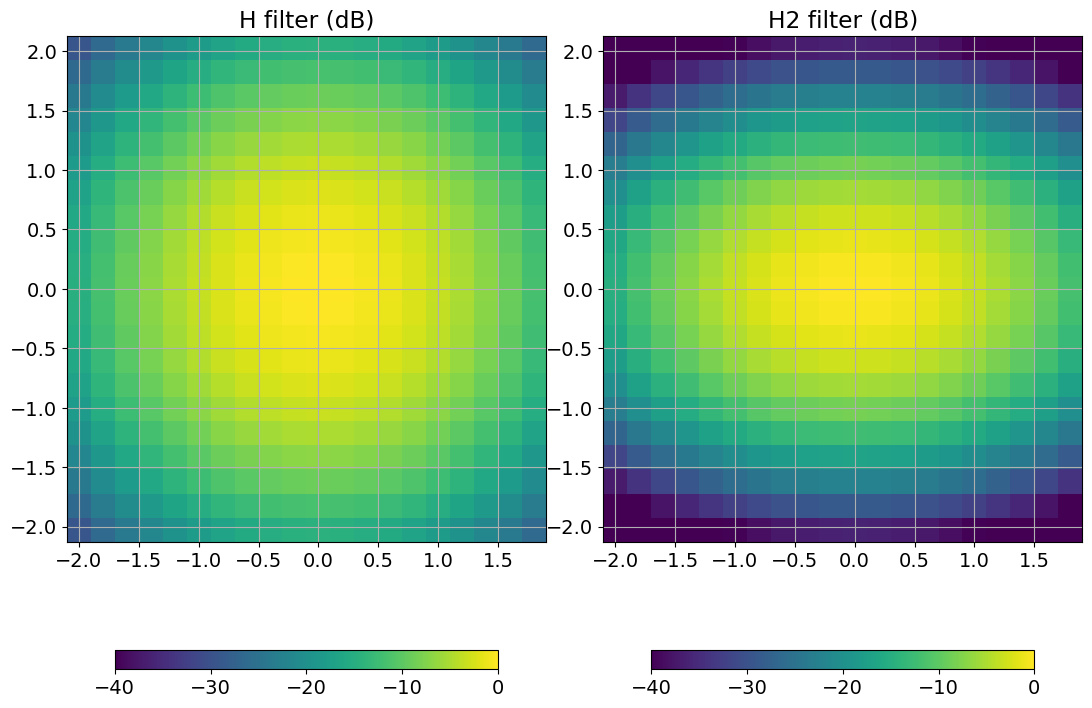

/tmp/ipykernel_17974/1890040334.py:24: RuntimeWarning: divide by zero encountered in log10
  im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(Eta_SWOT_nonoise),cmap='viridis',rasterized=True,vmin=20, vmax=60)
/tmp/ipykernel_17974/1890040334.py:24: RuntimeWarning: invalid value encountered in log10
  im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(Eta_SWOT_nonoise),cmap='viridis',rasterized=True,vmin=20, vmax=60)


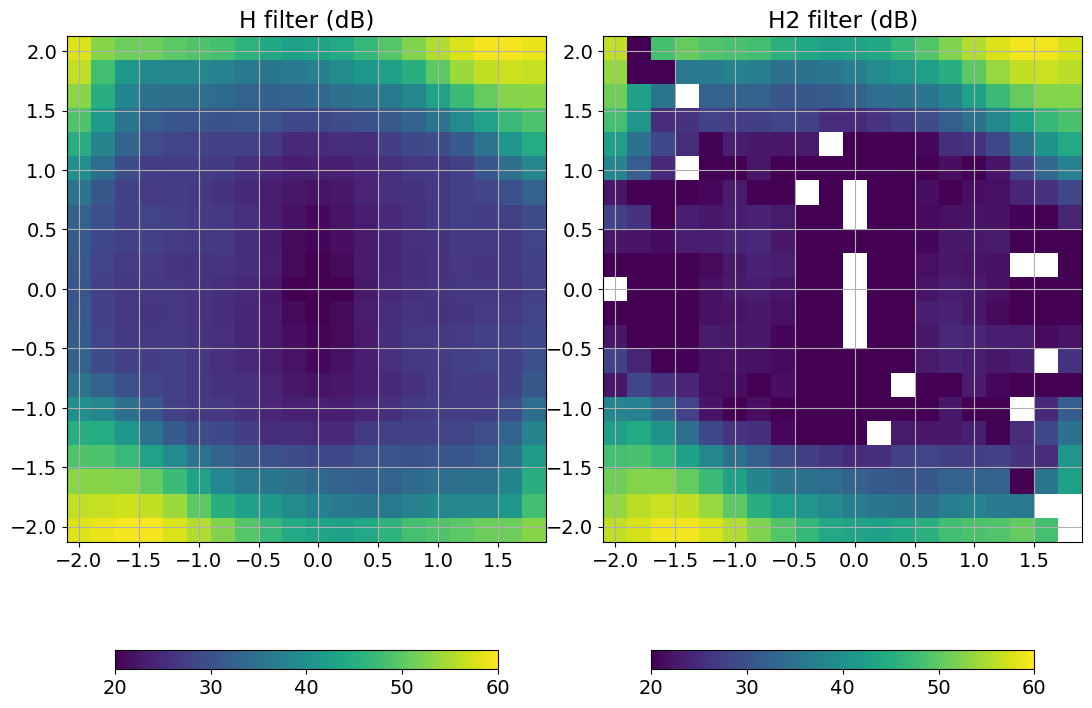

In [69]:
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10.8,8.5))
        plt.subplots_adjust(left=0.05,bottom=0.07, top=0.92,wspace=0.12,right=0.99)
        im=ax[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10(HH),cmap='viridis',rasterized=True,vmin=-40, vmax=0)
        _=plt.colorbar(im,ax=ax[0],label='', location='bottom',shrink=0.8)
        _=ax[0].set_title('H filter (dB)')
 #plt.setp(axs[1].get_yticklabels(), visible=False)
          
    
        im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(HH2),cmap='viridis',rasterized=True,vmin=-40, vmax=0)
        _=plt.colorbar(im,ax=ax[1],label='', location='bottom',shrink=0.8)
        _=ax[1].set_title('H2 filter (dB)')

         
        plt.show()
        
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10.8,8.5))
        plt.subplots_adjust(left=0.05,bottom=0.07, top=0.92,wspace=0.12,right=0.99)
        im=ax[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10(E_SWOT/HH2),cmap='viridis',rasterized=True,vmin=20, vmax=60)
        _=plt.colorbar(im,ax=ax[0],label='', location='bottom',shrink=0.8)
        _=ax[0].set_title('last spectrum (dB)')
 #plt.setp(axs[1].get_yticklabels(), visible=False)
          
        HH3=HH*(HH2/HH)
        im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(Eta_SWOT_nonoise),cmap='viridis',rasterized=True,vmin=20, vmax=60)
        _=plt.colorbar(im,ax=ax[1],label='', location='bottom',shrink=0.8)
        _=ax[1].set_title('last spectrum denoised (dB)')

         
        plt.show()
